In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("Lagomorpha_out_iqtree.MF.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n89          1.7060 ( 1.5918,  1.9128) ( 1.5743,  1.8764)  0.3021 (Jnode 174)\n',
 't_n90          0.4963 ( 0.4815,  0.5112) ( 0.4818,  0.5114)  0.0296 (Jnode 173)\n',
 't_n91          0.4838 ( 0.4671,  0.4999) ( 0.4677,  0.5002)  0.0325 (Jnode 172)\n',
 't_n92          0.4621 ( 0.4412,  0.4815) ( 0.4420,  0.4820)  0.0400 (Jnode 171)\n',
 't_n93          0.4437 ( 0.4190,  0.4659) ( 0.4206,  0.4670)  0.0464 (Jnode 170)\n',
 't_n94          0.3859 ( 0.3541,  0.4124) ( 0.3548,  0.4128)  0.0580 (Jnode 169)\n',
 't_n95          0.3836 ( 0.3516,  0.4106) ( 0.3522,  0.4112)  0.0589 (Jnode 168)\n',
 't_n96          0.3629 ( 0.3213,  0.3953) ( 0.3243,  0.3975)  0.0733 (Jnode 167)\n',
 't_n97          0.3167 ( 0.2315,  0.3723) ( 0.2437,  0.3780)  0.1343 (Jnode 166)\n',
 't_n98          0.3121 ( 0.2757,  0.3437) ( 0.2778,  0.3453)  0.0676 (Jnode 165)\n',
 't_n99          0.2212 ( 0.1807,  0.2602) ( 0.1829,  0.2620)  0.0791 (Jnode 164)\n',
 't_n100         0.1891 ( 0.1502,  0.2304) ( 0.1497,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    lower_ci_iqtree.append(float(line[3][:-1]))
    upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
    
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#     
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175']

In [6]:
posterior_mean_iqtree

[1.706,
 0.4963,
 0.4838,
 0.4621,
 0.4437,
 0.3859,
 0.3836,
 0.3629,
 0.3167,
 0.3121,
 0.2212,
 0.1891,
 0.1264,
 0.12,
 0.1016,
 0.0582,
 0.0546,
 0.0394,
 0.0828,
 0.1537,
 0.3074,
 0.2893,
 0.2444,
 0.2373,
 0.2164,
 0.1722,
 0.0693,
 0.0573,
 0.0472,
 0.1876,
 0.1294,
 0.0977,
 0.0406,
 0.1657,
 0.1683,
 0.3431,
 0.2728,
 0.2405,
 0.1573,
 0.1016,
 0.0898,
 0.2692,
 0.404,
 0.3499,
 0.3516,
 0.2353,
 0.1841,
 0.3049,
 0.1828,
 0.1645,
 0.0517,
 0.0431,
 0.4378,
 0.373,
 0.3269,
 0.2692,
 0.2239,
 0.2112,
 0.174,
 0.1381,
 0.0917,
 0.0591,
 0.0535,
 0.104,
 0.1205,
 0.0616,
 0.0658,
 0.3182,
 0.3041,
 0.258,
 0.1211,
 0.1117,
 0.0794,
 0.0607,
 0.0517,
 0.2557,
 0.3351,
 0.2674,
 0.2127,
 0.1398,
 0.0841,
 0.0578,
 0.3073,
 0.2184,
 0.2217,
 0.3881,
 0.1958]

In [7]:
lower_ci_iqtree

[1.5918,
 0.4815,
 0.4671,
 0.4412,
 0.419,
 0.3541,
 0.3516,
 0.3213,
 0.2315,
 0.2757,
 0.1807,
 0.1502,
 0.0931,
 0.088,
 0.0732,
 0.037,
 0.0347,
 0.0182,
 0.0453,
 0.0948,
 0.2709,
 0.2495,
 0.2026,
 0.1952,
 0.1743,
 0.1288,
 0.0351,
 0.0275,
 0.0051,
 0.1434,
 0.0885,
 0.0612,
 0.0188,
 0.0849,
 0.0683,
 0.2827,
 0.1959,
 0.1371,
 0.0891,
 0.0492,
 0.0343,
 0.06,
 0.3644,
 0.2815,
 0.2766,
 0.1412,
 0.0296,
 0.2209,
 0.103,
 0.0886,
 0.0146,
 0.0047,
 0.411,
 0.3405,
 0.2904,
 0.2317,
 0.1849,
 0.1727,
 0.1365,
 0.1021,
 0.0598,
 0.0357,
 0.0281,
 0.0626,
 0.069,
 0.0249,
 0.0228,
 0.2813,
 0.2653,
 0.2066,
 0.0747,
 0.0668,
 0.0257,
 0.0239,
 0.0234,
 0.1273,
 0.2844,
 0.2048,
 0.1464,
 0.0801,
 0.0375,
 0.005,
 0.2455,
 0.0754,
 0.1008,
 0.2482,
 0.0481]

In [8]:
upper_ci_iqtree

[1.9128,
 0.5112,
 0.4999,
 0.4815,
 0.4659,
 0.4124,
 0.4106,
 0.3953,
 0.3723,
 0.3437,
 0.2602,
 0.2304,
 0.1643,
 0.1576,
 0.1361,
 0.0838,
 0.0787,
 0.0668,
 0.1229,
 0.205,
 0.3395,
 0.3241,
 0.2842,
 0.2774,
 0.2583,
 0.2173,
 0.1134,
 0.0972,
 0.119,
 0.2334,
 0.1747,
 0.1408,
 0.0725,
 0.2352,
 0.2784,
 0.387,
 0.334,
 0.3199,
 0.2267,
 0.1676,
 0.1658,
 0.3824,
 0.4355,
 0.4008,
 0.4083,
 0.3238,
 0.3559,
 0.3732,
 0.2819,
 0.2595,
 0.1206,
 0.1099,
 0.4621,
 0.4039,
 0.3638,
 0.3078,
 0.2628,
 0.2495,
 0.2124,
 0.1793,
 0.1292,
 0.0885,
 0.0838,
 0.1495,
 0.1757,
 0.1169,
 0.123,
 0.3559,
 0.3433,
 0.3097,
 0.1754,
 0.1653,
 0.1412,
 0.1102,
 0.0914,
 0.3233,
 0.3788,
 0.3279,
 0.285,
 0.2144,
 0.1527,
 0.1595,
 0.3666,
 0.3355,
 0.3491,
 0.6348,
 0.3777]

In [9]:
file_mcmctree = open("Lagomotpha_out_baseml_HKY_G5.txt", "r")
lines1 = file_mcmctree.readlines()
file_mcmctree.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    lower_ci_baseml.append(float(line[3][:-1]))
    upper_ci_baseml.append(float(line[4][:-1]))
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
for line in var_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_baseml.append(float(line[1]))
    lower_ci_var_baseml.append(float(line[3][:-1]))
    upper_ci_var_baseml.append(float(line[4][:-1]))

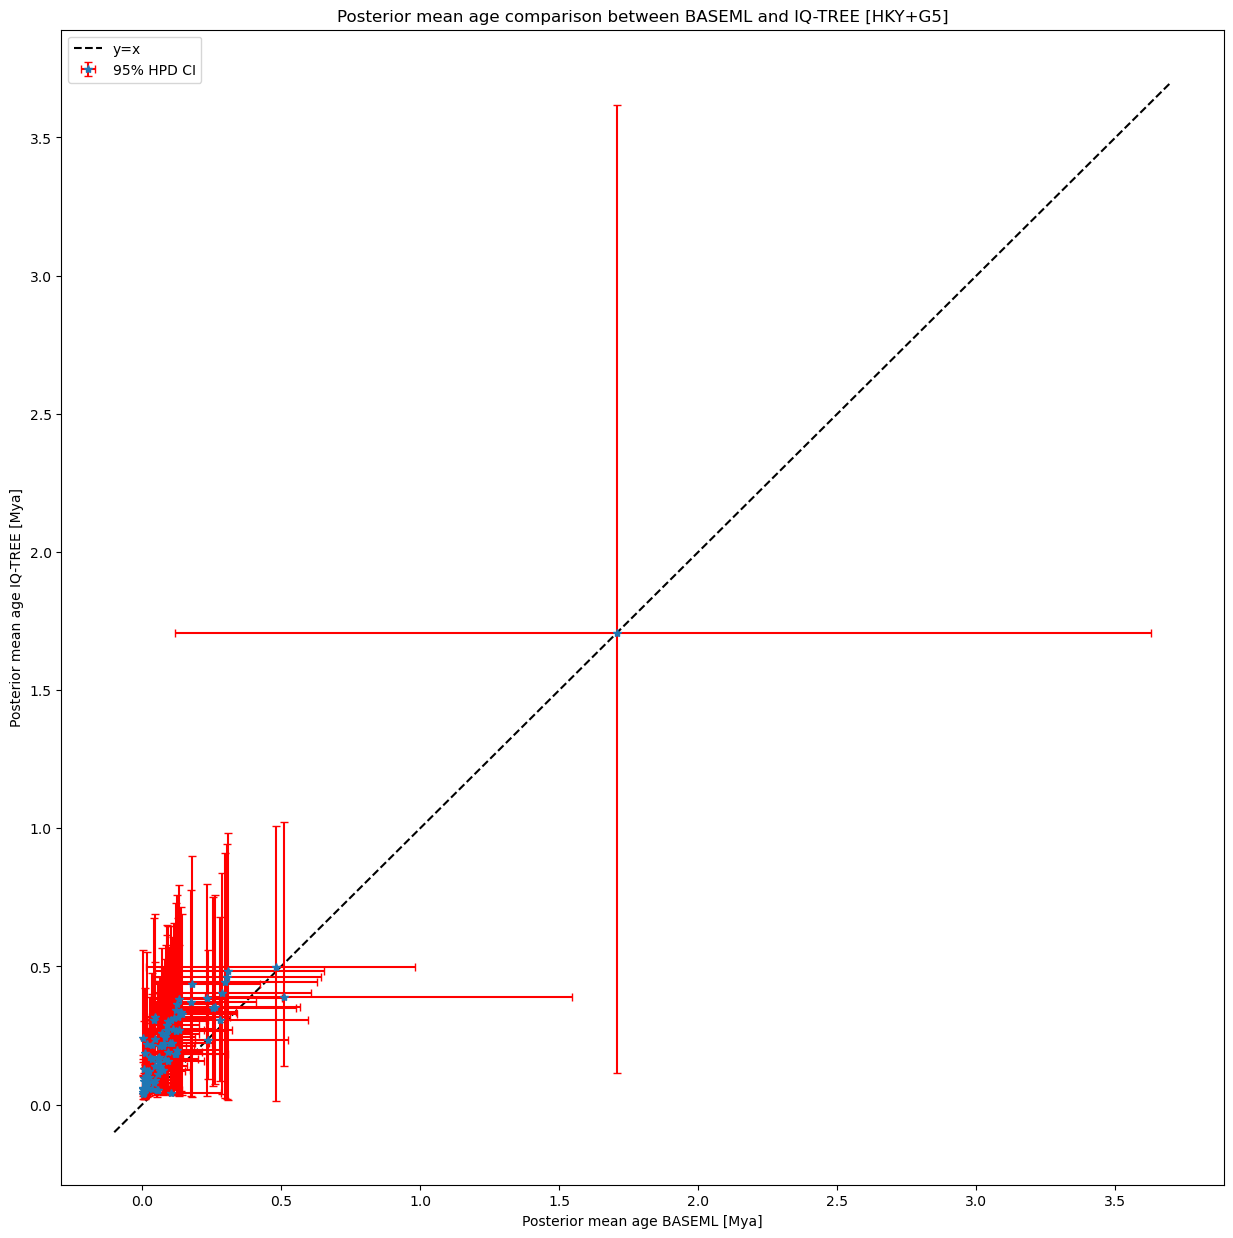

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,3.7], 
        [-0.1, 3.7], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age BASEML [Mya]')
ax.set_ylabel('Posterior mean age IQ-TREE [Mya]')
ax.set_title('Posterior mean age comparison between BASEML and IQ-TREE [HKY+G5]')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./Lagomorpha_posterior_mean_age_comparison_HKY_G5_MF.png')

In [11]:
posterior_mean_baseml

[1.7092,
 0.4834,
 0.3107,
 0.3049,
 0.2976,
 0.2341,
 0.1339,
 0.1241,
 0.045,
 0.1131,
 0.1061,
 0.0942,
 0.0746,
 0.0244,
 0.0184,
 0.0101,
 0.0061,
 0.0033,
 0.0197,
 0.0602,
 0.1058,
 0.0905,
 0.0842,
 0.0476,
 0.0374,
 0.0292,
 0.0148,
 0.0042,
 0.0043,
 0.0091,
 0.0083,
 0.0073,
 0.0069,
 0.034,
 0.059,
 0.1203,
 0.1122,
 0.0038,
 0.0936,
 0.0254,
 0.0451,
 0.0883,
 0.2857,
 0.2561,
 0.2637,
 0.2377,
 0.1193,
 0.2787,
 0.1205,
 0.0838,
 0.0581,
 0.1058,
 0.1802,
 0.175,
 0.142,
 0.1336,
 0.0777,
 0.0655,
 0.06,
 0.0479,
 0.0134,
 0.0113,
 0.0097,
 0.0141,
 0.0195,
 0.0017,
 0.0127,
 0.1309,
 0.0945,
 0.0717,
 0.0633,
 0.0575,
 0.0445,
 0.0206,
 0.0522,
 0.0845,
 0.1403,
 0.1228,
 0.0747,
 0.0641,
 0.0073,
 0.0342,
 0.0418,
 0.0176,
 0.1022,
 0.5106,
 0.1245]

In [12]:
posterior_mean_iqtree

[1.706,
 0.4963,
 0.4838,
 0.4621,
 0.4437,
 0.3859,
 0.3836,
 0.3629,
 0.3167,
 0.3121,
 0.2212,
 0.1891,
 0.1264,
 0.12,
 0.1016,
 0.0582,
 0.0546,
 0.0394,
 0.0828,
 0.1537,
 0.3074,
 0.2893,
 0.2444,
 0.2373,
 0.2164,
 0.1722,
 0.0693,
 0.0573,
 0.0472,
 0.1876,
 0.1294,
 0.0977,
 0.0406,
 0.1657,
 0.1683,
 0.3431,
 0.2728,
 0.2405,
 0.1573,
 0.1016,
 0.0898,
 0.2692,
 0.404,
 0.3499,
 0.3516,
 0.2353,
 0.1841,
 0.3049,
 0.1828,
 0.1645,
 0.0517,
 0.0431,
 0.4378,
 0.373,
 0.3269,
 0.2692,
 0.2239,
 0.2112,
 0.174,
 0.1381,
 0.0917,
 0.0591,
 0.0535,
 0.104,
 0.1205,
 0.0616,
 0.0658,
 0.3182,
 0.3041,
 0.258,
 0.1211,
 0.1117,
 0.0794,
 0.0607,
 0.0517,
 0.2557,
 0.3351,
 0.2674,
 0.2127,
 0.1398,
 0.0841,
 0.0578,
 0.3073,
 0.2184,
 0.2217,
 0.3881,
 0.1958]

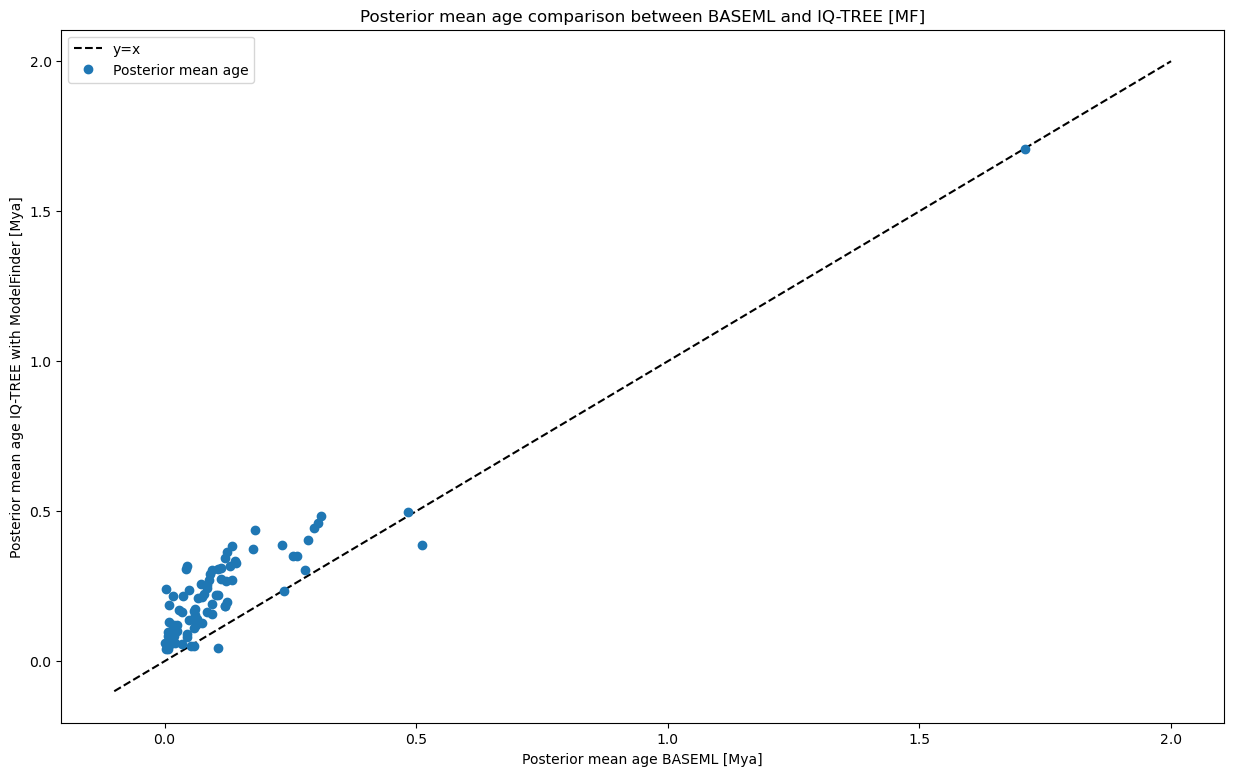

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot([-0.1,2.0], 
        [-0.1, 2.0], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age BASEML [Mya]')
ax.set_ylabel('Posterior mean age IQ-TREE with ModelFinder [Mya]')
ax.set_title('Posterior mean age comparison between BASEML and IQ-TREE [MF]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./Lagomorpha_posterior_mean_age_comparison_HKY_G5_scatter_MF.png')